House Prices EDA and Linear Regression Model

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\admin'\AppData\Local\Temp\ipykernel_4504\793351852.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# summary statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As there are some features with too many missing values, they would not be relevant in our EDA. It is better to concentrate on features that have enough values to give us insights.

Let's remove features with more than 25% NaN values

In [6]:
df.loc[:, df.isnull().mean() > .25]

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,NaN,NaN,NaN,NaN
1,NaN,NaN,TA,NaN,NaN,NaN
2,NaN,BrkFace,TA,NaN,NaN,NaN
3,NaN,NaN,Gd,NaN,NaN,NaN
4,NaN,BrkFace,TA,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,NaN,NaN,TA,NaN,NaN,NaN
1456,NaN,Stone,TA,NaN,MnPrv,NaN
1457,NaN,NaN,Gd,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.loc[:, df.isnull().mean() < .25]
df = df.iloc[:,1:]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, MasVnrType, FireplaceQu

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

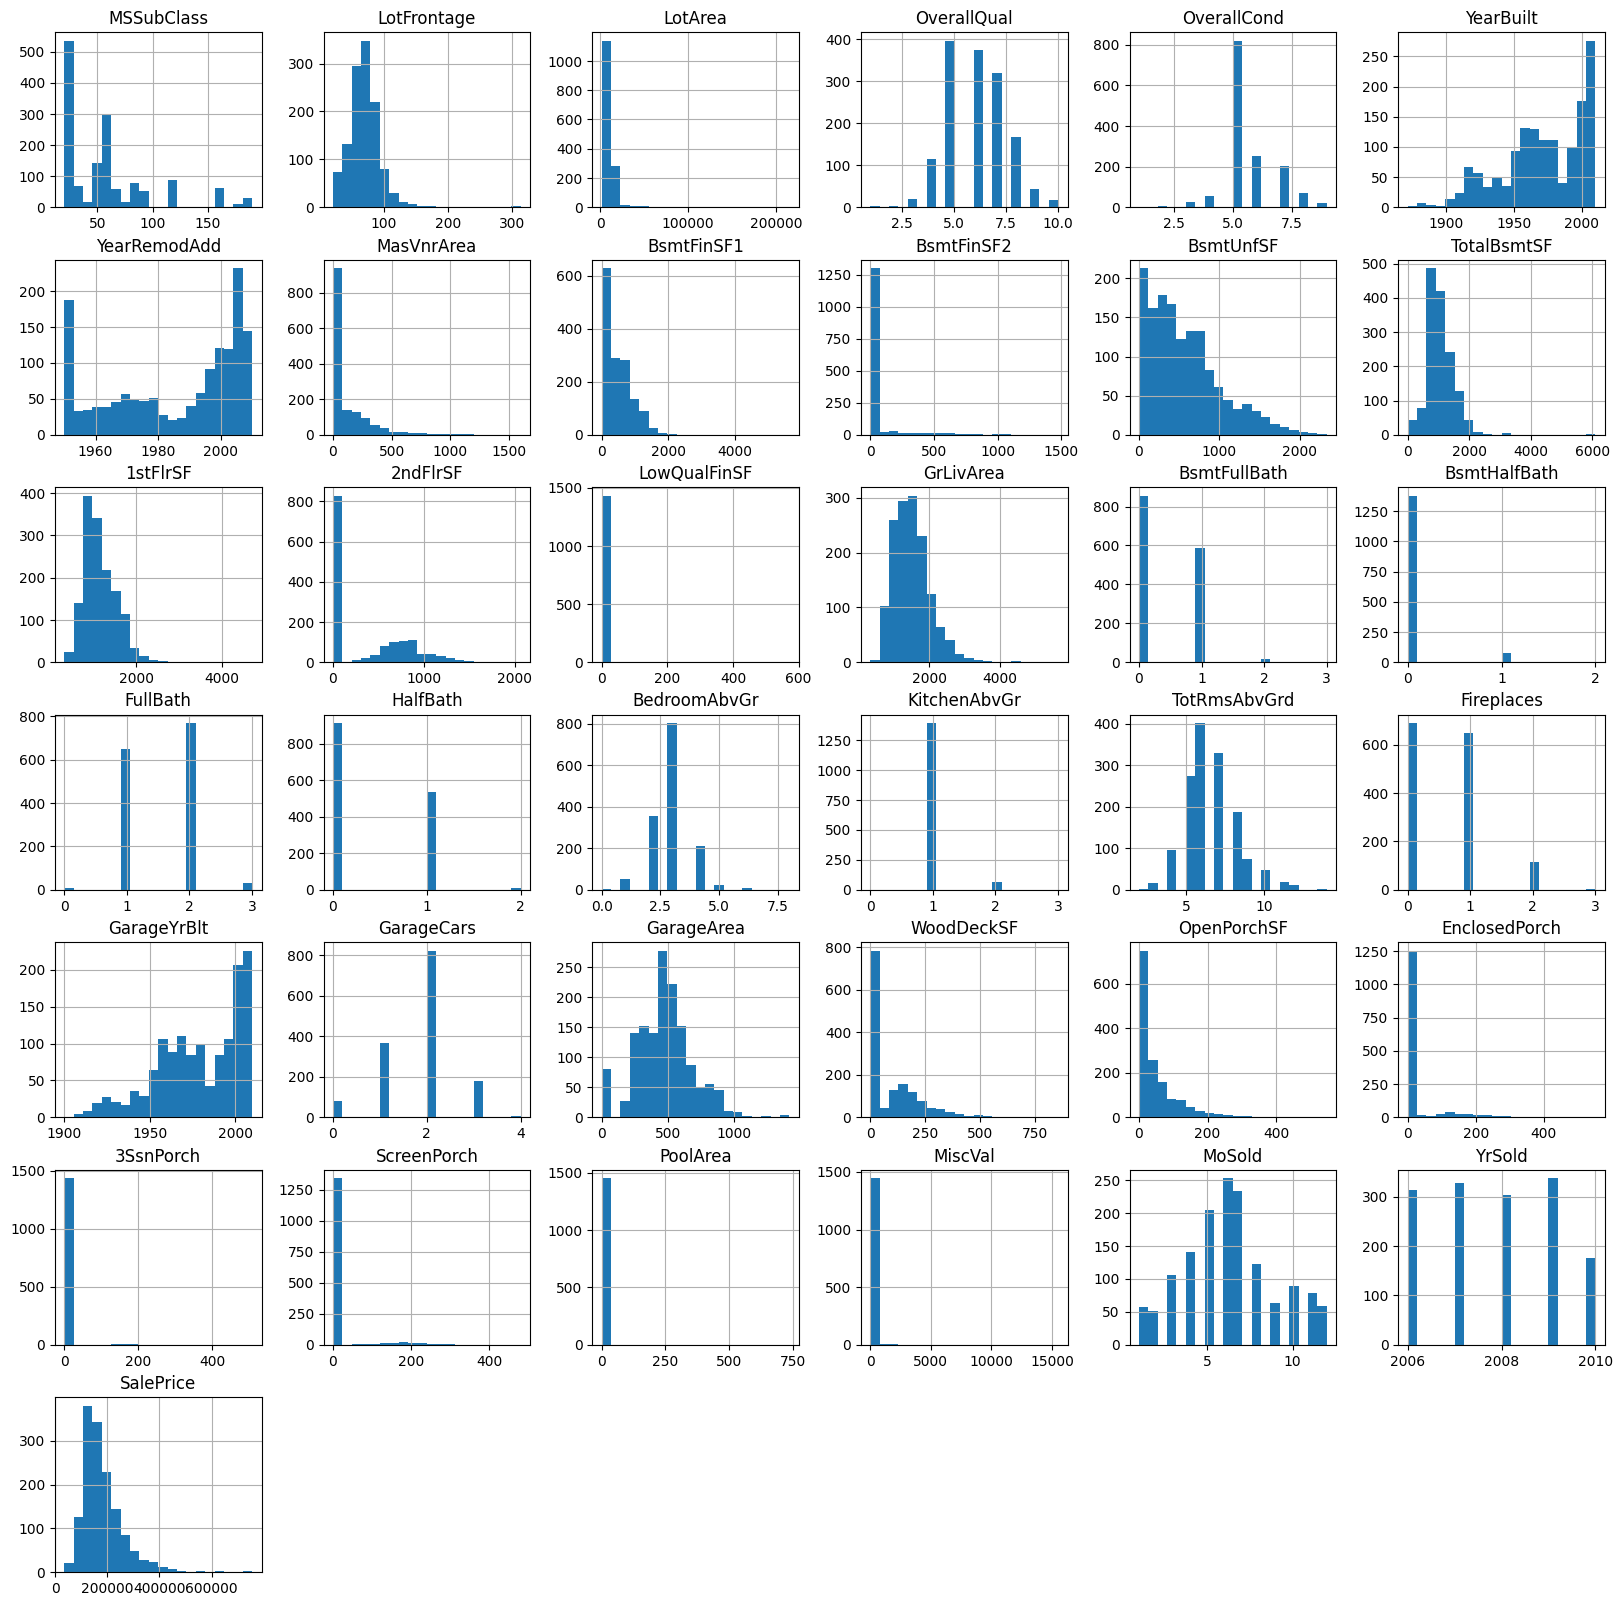

In [9]:
df.hist(figsize=(20,20), bins=20)

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

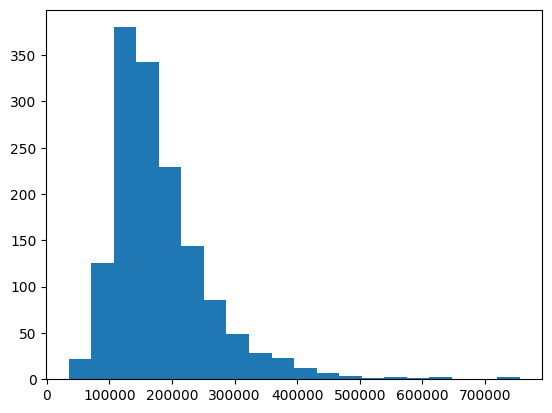

In [10]:
plt.hist(df['SalePrice'], bins=20)

We can take note that the SalePrice is skewed to the right

In [38]:
# filter dataframe for numeric features
df_num = df.select_dtypes(include=np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [39]:
# Check correlations between all the variables using corr()

df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice

# select features with correlation
selected_features_corr = df_num_corr[abs(df_num_corr) > 0.5]
selected_features_corr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

There are 10 features that strongly correlate with price

<Axes: >

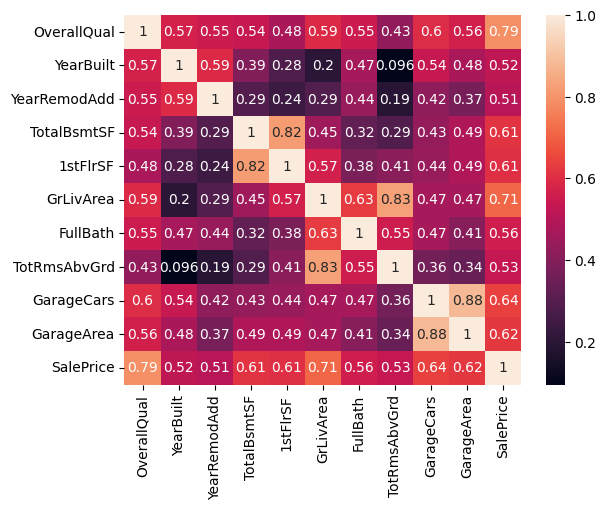

In [51]:
selected_features = df_num[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]

# sns.heatmap(selected_features.corr(numeric_only=True), annot = True)

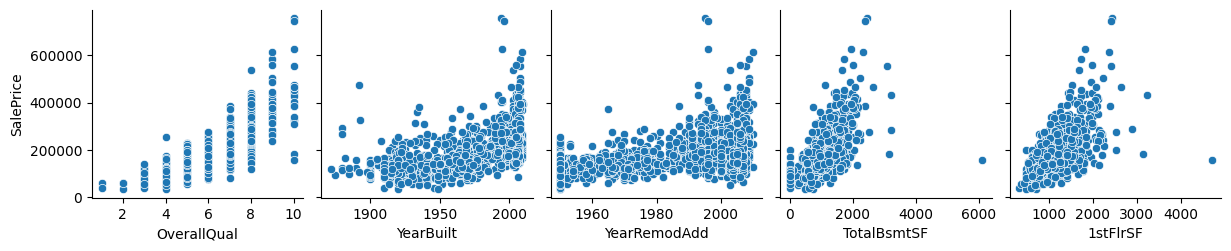

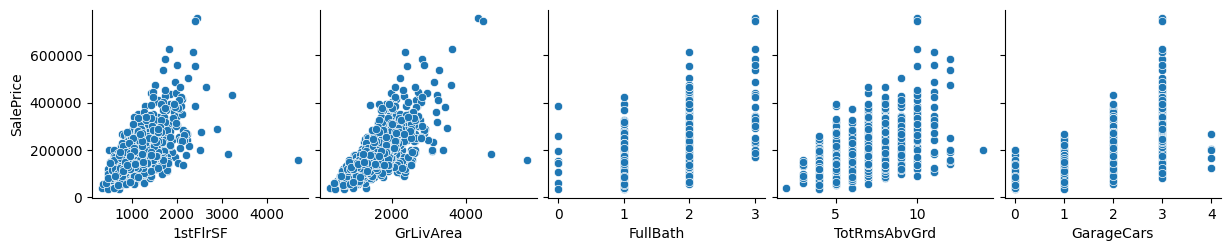

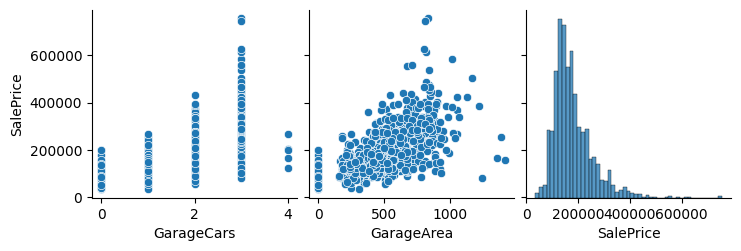

In [52]:
# for i in range(0, len(df_num.columns)):
#     sns.pairplot(data=df_num,
#                 x_vars=df_num.columns[i:i+5],
#                 y_vars=['SalePrice'])
for i in range(0, len(selected_features.columns), 4):
    sns.pairplot(data=selected_features,
                x_vars=selected_features.columns[i:i+5],
                y_vars=['SalePrice'])


In [84]:
X_train = selected_features[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y_train = selected_features['SalePrice']

In [58]:
X_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836


In [64]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [62]:
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
lm.intercept_

-1186193.7666661472

In [67]:
lm.coef_

array([ 1.96045898e+04,  2.68240707e+02,  2.96481161e+02,  1.98650991e+01,
        1.41737355e+01,  5.12971178e+01, -6.79087146e+03,  3.31050771e+01,
        1.04179010e+04,  1.49475334e+01])

In [68]:
lm.coef_.shape

(10,)

In [69]:
pd.DataFrame(lm.coef_, columns=['Coefficients'])

,Coefficients
0,19604.589772
1,268.240707
2,296.481161
3,19.865099
4,14.173735
5,51.297118
6,-6790.871458
7,33.105077
8,10417.901008
9,14.947533


In [71]:
pd.DataFrame(lm.coef_,X_train.columns, columns=['Coefficients'])

,Coefficients
OverallQual,19604.589772
YearBuilt,268.240707
YearRemodAdd,296.481161
TotalBsmtSF,19.865099
1stFlrSF,14.173735
GrLivArea,51.297118
FullBath,-6790.871458
TotRmsAbvGrd,33.105077
GarageCars,10417.901008
GarageArea,14.947533


#### Coefficient of Determination (R^2)

In [72]:
lm.score(X_train, y_train)

0.7736928402773304

In [73]:
import statsmodels.api as sm

In [74]:
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,1.0,7,2003,2003,856,856,1710,2,8,2,548
1,1.0,6,1976,1976,1262,1262,1262,2,6,2,460
2,1.0,7,2001,2002,920,920,1786,2,6,2,608
3,1.0,7,1915,1970,756,961,1717,1,7,3,642
4,1.0,8,2000,2000,1145,1145,2198,2,9,3,836


In [75]:
model = sm.OLS(y_train,X_train_const)


In [76]:
model_results = model.fit()

In [77]:
model_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.772     
Dependent Variable:      SalePrice            AIC:                    34940.6848
Date:                    2024-03-17 11:08     BIC:                    34998.8329
No. Observations:        1460                 Log-Likelihood:         -17459.   
Df Model:                10                   F-statistic:            495.4     
Df Residuals:            1449                 Prob (F-statistic):     0.00      
R-squared:               0.774                Scale:                  1.4381e+09
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const        -1186193.7667 129116.0631 -9.1870 0.0000 -1439468.1599 -932919.3734
OverallQual     19604.5898   1190.1586 16.4723 0.0000    17269.9718   21939.2078
YearBuilt         268.2407     50.3462  5.3279 0.0000      169.4814     367.0000
YearRemodAdd      296.4812     63.6346  4.6591 0.0000      171.6554     421.3069
TotalBsmtSF        19.8651      4.2954  4.6247 0.0000       11.4392      28.2910
1stFlrSF           14.1737      4.9297  2.8752 0.0041        4.5036      23.8439
GrLivArea          51.2971      4.2326 12.1195 0.0000       42.9944      59.5998
FullBath        -6790.8715   2682.3689 -2.5317 0.0115   -12052.6130   -1529.1299
TotRmsAbvGrd       33.1051   1119.0612  0.0296 0.9764    -2162.0483    2228.2584
GarageCars      10417.9010   3044.2723  3.4221 0.0006     4446.2489   16389.5531
GarageArea         14.9475     10.3114  1.4496 0.1474       -5.2794      35.1744
--------------------------------------------------------------------------------
Omnibus:                 477.814           Durbin-Watson:              1.985    
Prob(Omnibus):           0.000             Jarque-Bera (JB):           58906.279
Skew:                    -0.412            Prob(JB):                   0.000    
Kurtosis:                34.107            Condition No.:              469240   
================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The condition number is large, 4.69e+05. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [79]:
model_results.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-1.186194e+06,129116.063146,-9.187035,1.356200e-19,-1.439468e+06,-932919.373390
OverallQual,1.960459e+04,1190.158562,16.472250,5.166583e-56,1.726997e+04,21939.207791
YearBuilt,2.682407e+02,50.346250,5.327918,1.150539e-07,1.694814e+02,367.000036
YearRemodAdd,2.964812e+02,63.634597,4.659119,3.467105e-06,1.716554e+02,421.306946
TotalBsmtSF,1.986510e+01,4.295438,4.624697,4.085733e-06,1.143916e+01,28.291041
1stFlrSF,1.417374e+01,4.929722,2.875159,4.097244e-03,4.503581e+00,23.843890
GrLivArea,5.129712e+01,4.232619,12.119473,2.860875e-32,4.299440e+01,59.599835
FullBath,-6.790871e+03,2682.368909,-2.531669,1.145705e-02,-1.205261e+04,-1529.129879
TotRmsAbvGrd,3.310508e+01,1119.061239,0.029583,9.764038e-01,-2.162048e+03,2228.258411
GarageCars,1.041790e+04,3044.272255,3.422132,6.386199e-04,4.446249e+03,16389.553099


All variables are at 5% significance level except "TotRmsAbvGrd and "GarageArea"

We would drop "TotRmsAbvGrd" as the p-value is very high

In [85]:
X_train = X_train.drop(columns='TotRmsAbvGrd')

In [86]:
X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,2,548
1,6,1976,1976,1262,1262,1262,2,2,460
2,7,2001,2002,920,920,1786,2,2,608
3,7,1915,1970,756,961,1717,1,3,642
4,8,2000,2000,1145,1145,2198,2,3,836
...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,2,460
1456,6,1978,1988,1542,2073,2073,2,2,500
1457,7,1941,2006,1152,1188,2340,2,1,252
1458,5,1950,1996,1078,1078,1078,1,1,240


In [87]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [88]:
lm.intercept_

-1186193.7666661472

In [97]:
lm.coef_.shape

(10,)

In [99]:
pd.DataFrame(lm2.coef_, X_train.columns, columns=['Coefficients'])

,Coefficients
OverallQual,19602.503720
YearBuilt,268.120529
YearRemodAdd,296.437926
TotalBsmtSF,19.856086
1stFlrSF,14.174127
GrLivArea,51.382104
FullBath,-6780.296158
GarageCars,10425.405869
GarageArea,14.926309


In [100]:
lm2.score(X_train, y_train)

0.7736927035953038

In [101]:
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
0,1.0,7,2003,2003,856,856,1710,2,2,548
1,1.0,6,1976,1976,1262,1262,1262,2,2,460
2,1.0,7,2001,2002,920,920,1786,2,2,608
3,1.0,7,1915,1970,756,961,1717,1,3,642
4,1.0,8,2000,2000,1145,1145,2198,2,3,836


In [102]:
model2 = sm.OLS(y_train,X_train_const)
model2_results = model2.fit()
model2_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.772     
Dependent Variable:      SalePrice            AIC:                    34938.6857
Date:                    2024-03-17 11:19     BIC:                    34991.5476
No. Observations:        1460                 Log-Likelihood:         -17459.   
Df Model:                9                    F-statistic:            550.8     
Df Residuals:            1450                 Prob (F-statistic):     0.00      
R-squared:               0.774                Scale:                  1.4371e+09
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const        -1185782.0460 128319.5489 -9.2409 0.0000 -1437493.8497 -934070.2422
OverallQual     19602.5037   1187.6584 16.5052 0.0000    17272.7915   21932.2160
YearBuilt         268.1205     50.1648  5.3448 0.0000      169.7172     366.5239
YearRemodAdd      296.4379     63.5959  4.6613 0.0000      171.6881     421.1877
TotalBsmtSF        19.8561      4.2831  4.6359 0.0000       11.4543      28.2579
1stFlrSF           14.1741      4.9280  2.8762 0.0041        4.5073      23.8409
GrLivArea          51.3821      3.1073 16.5358 0.0000       45.2868      57.4774
FullBath        -6780.2962   2657.5254 -2.5514 0.0108   -11993.3016   -1567.2907
GarageCars      10425.4059   3032.6381  3.4377 0.0006     4476.5788   16374.2330
GarageArea         14.9263     10.2829  1.4516 0.1468       -5.2446      35.0972
--------------------------------------------------------------------------------
Omnibus:                 478.177           Durbin-Watson:              1.985    
Prob(Omnibus):           0.000             Jarque-Bera (JB):           58969.223
Skew:                    -0.413            Prob(JB):                   0.000    
Kurtosis:                34.124            Condition No.:              466504   
================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The condition number is large, 4.67e+05. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [114]:
y_model_pred = lm2.predict(X_train)
results = pd.DataFrame({'Actual': y_train, 'Predicted': y_model_pred})
results.head()

,Actual,Predicted
0,208500,214709.163461
1,181500,169347.150320
2,223500,220855.036532
3,140000,199803.229942
4,250000,282251.372827


In [115]:
results['residuals'] = results['Actual'] - results['Predicted']
results.head()

,Actual,Predicted,residuals
0,208500,214709.163461,-6209.163461
1,181500,169347.150320,12152.849680
2,223500,220855.036532,2644.963468
3,140000,199803.229942,-59803.229942
4,250000,282251.372827,-32251.372827


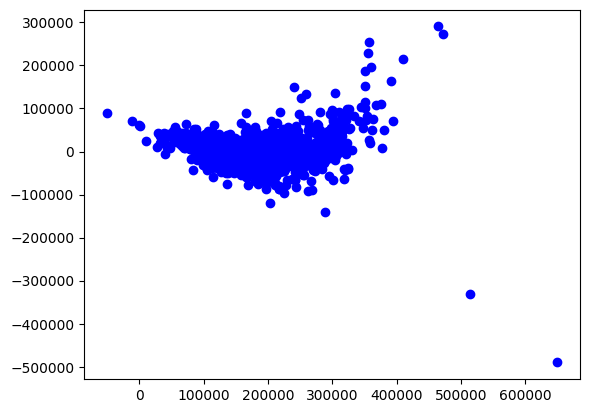

In [116]:
plt.scatter(results['Predicted'], results['residuals'],  color='blue')

(array([  1.,   1.,   0.,   6.,   9.,  23.,  54., 147., 268., 336., 267.,
        180.,  77.,  33.,  21.,   8.,  11.,   3.,   1.,   2.,   2.,   1.,
          1.,   1.,   1.,   1.,   0.,   1.,   1.,   1.]),
 array([-141228.4644691 , -126839.4492551 , -112450.4340411 ,
         -98061.41882709,  -83672.40361309,  -69283.38839909,
         -54894.37318509,  -40505.35797109,  -26116.34275708,
         -11727.32754308,    2661.68767092,   17050.70288492,
          31439.71809892,   45828.73331293,   60217.74852693,
          74606.76374093,   88995.77895493,  103384.79416894,
         117773.80938294,  132162.82459694,  146551.83981094,
         160940.85502494,  175329.87023895,  189718.88545295,
         204107.90066695,  218496.91588095,  232885.93109496,
         247274.94630896,  261663.96152296,  276052.97673696,
         290441.99195096]),
 <BarContainer object of 30 artists>)

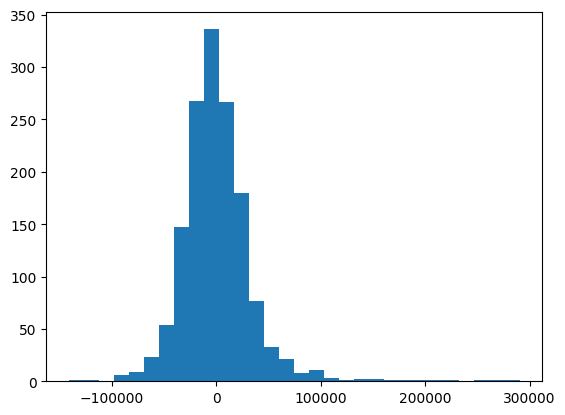

In [117]:
results2 = results[results['residuals'] > -300000]  

plt.hist(results2['residuals'], bins=30)

In [118]:
from scipy import stats
from scipy.stats import norm, kstest

np.random.seed(873)

# Null hypothesis: distributions are the same
# Alternative hypothesis: distributions are NOT the same

# getting the loc (mean) and scale (std dev) for residuals
loc, scale = norm.fit(results['residuals'])

# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)

# perform the KS-test using residuals compared to a normal distribution in the correct scale
stat, p = stats.kstest(results['residuals'], n.cdf)

# print p-value: if p-value is <0.05 (5% significance), then reject null hypothesis (that the two distributions are the same)
print('Residuals: Statistics=%.3f, p=%.9f' % (stat, p))

Residuals: Statistics=0.107, p=0.000000000


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(1,6):
    v = vif(X_train_const.values, i)
    print("VIF for {}:{}".format(X_train_const.columns[i], round(v, 4)))

VIF for OverallQual:2.739
VIF for YearBuilt:2.3306
VIF for YearRemodAdd:1.7501
VIF for TotalBsmtSF:3.5845
VIF for 1stFlrSF:3.6847


Since the VIF values are quite small (i.e., less than 10), there is no signs of multi-collinearity. 


## Evaluating the model against Test Dataset

In [121]:
df_test = pd.read_csv('train.csv')

In [122]:
X_test = df_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']]
y_test = df_test['SalePrice']

In [124]:
y_pred = lm2.predict(X_test)

In [126]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,2,548
1,6,1976,1976,1262,1262,1262,2,2,460
2,7,2001,2002,920,920,1786,2,2,608
3,7,1915,1970,756,961,1717,1,3,642
4,8,2000,2000,1145,1145,2198,2,3,836
...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,2,460
1456,6,1978,1988,1542,2073,2073,2,2,500
1457,7,1941,2006,1152,1188,2340,2,1,252
1458,5,1950,1996,1078,1078,1078,1,1,240


In [127]:
y_actual = y_test.to_numpy()

In [128]:
for i in range(0,5):
    print('\nActual:   ' + str(round(y_actual[i])))
    print('Predict.: ' + str(round(y_pred[i])))
    print('Differ.:  ' + str(round(y_actual[i]-y_pred[i])))


Actual:   208500
Predict.: 214709
Differ.:  -6209

Actual:   181500
Predict.: 169347
Differ.:  12153

Actual:   223500
Predict.: 220855
Differ.:  2645

Actual:   140000
Predict.: 199803
Differ.:  -59803

Actual:   250000
Predict.: 282251
Differ.:  -32251


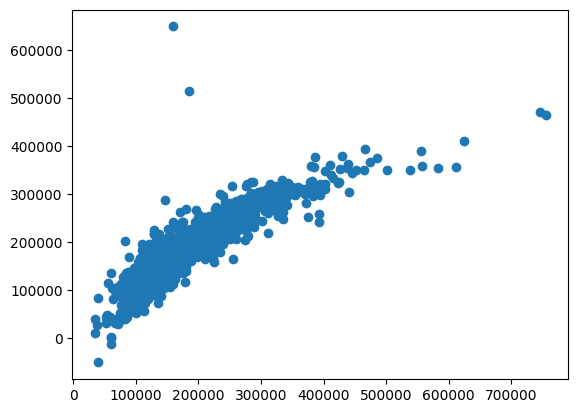

In [129]:
plt.scatter(y_test,y_pred)

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [131]:
rmse

37779.25718891781

In [132]:
rmse_model = mean_squared_error(y_train, y_model_pred)
rmse_model

1427272273.746398

In [133]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7736927035953038